## Logistic Regression with TF/Keras Library

In this section, we will implement logistic regression and apply on Fashion MNIST database. The database contains images of articles of clothing and the task is to classify these images as one of a select number of labels. Training set contains $60000$ images and Test set contains $10000$ images. There are a total of $10$ class labels. Each image is a $28 \times 28$ matrix of pixel values.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Download Fashion MNIST data
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(trImages, trLabels), (tImages, tLabels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print(np.shape(trImages))
print(np.shape(tImages))
print(np.max(trImages[0]))
print(np.min(trImages[0]))

(60000, 28, 28)
(10000, 28, 28)
255
0


### Single-Layer Implementation

In the single-layer implementation of logistic regression, there is an input layer where each image is flattened into a vector of 28 x 28 = 784 elements and fed into a **Softmax** layer. Output of softmax layer are probabilities of the image belonging to one of the possible $10$ class labels. 


In [4]:
# Training Parameters
batchSize = 128
nEpochs = 50

In the code snippet below, we do the following:


1.   Defining a Sequential network model using Keras library
2.   Input images are flattened in the input layer and fed to subsequent layer
3.   Layer1 has 10 units whose activation function is **Softmax**
4.   Loss function is Sparse_Categorical_CrossEntropy
5.   Adam optimizer is used to minimize the above loss function during the training phase

A block diagram of the network shows dimensions of the various layers.

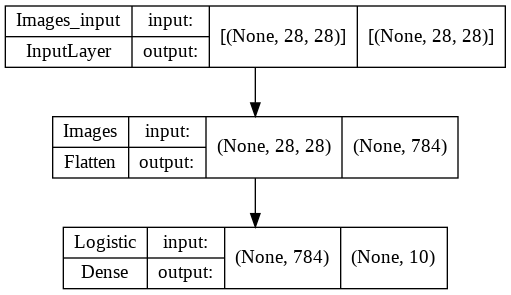

In [5]:
# Building a feed-forward network

model = tf.keras.Sequential() # empty model

# Layer0 simply flattens image input
layer0 = tf.keras.layers.Flatten(input_shape=np.shape(trImages[0]),name='Images')
model.add(layer0)

# Layer1 is the output layer
numUnits_L1 = 10
layer1 = tf.keras.layers.Dense(units=numUnits_L1, activation=tf.nn.softmax, use_bias=True, name='Logistic')
model.add(layer1)

# Compile model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy']) #'sparse_categorical_crossentropy'

# Plot Logistic Regression Network
tf.keras.utils.plot_model(model,show_shapes=True,show_layer_names=True)


In [6]:
# Normalizing input
trImages = trImages/255.0
tImages = tImages/255.0

# Train the model
trHistory = model.fit(x=trImages, y=trLabels, batch_size=batchSize, epochs=nEpochs,shuffle=False, validation_split=0.0)

Epoch 1/50
469/469 [==============================] - 4s 2ms/step - loss: 0.7265 - accuracy: 0.7631
Epoch 2/50
469/469 [==============================] - 1s 2ms/step - loss: 0.5126 - accuracy: 0.8284
Epoch 3/50
469/469 [==============================] - 1s 2ms/step - loss: 0.4719 - accuracy: 0.8418
Epoch 4/50
469/469 [==============================] - 1s 2ms/step - loss: 0.4506 - accuracy: 0.8483
Epoch 5/50
469/469 [==============================] - 1s 2ms/step - loss: 0.4369 - accuracy: 0.8515
Epoch 6/50
469/469 [==============================] - 1s 2ms/step - loss: 0.4271 - accuracy: 0.8542
Epoch 7/50
469/469 [==============================] - 1s 2ms/step - loss: 0.4196 - accuracy: 0.8564
Epoch 8/50
469/469 [==============================] - 1s 2ms/step - loss: 0.4137 - accuracy: 0.8581
Epoch 9/50
469/469 [==============================] - 1s 2ms/step - loss: 0.4089 - accuracy: 0.8599
Epoch 10/50
469/469 [==============================] - 1s 2ms/step - loss: 0.4048 - accuracy: 0.8611

In [7]:
tPrediction = model.predict(tImages) # output is a matrix of probabilities where each row corresponds to an image in the Test Set
idCount = 0
nErrs = 0
for _ in tPrediction:
  predictedLabel = np.argmax(_)
  if predictedLabel != tLabels[idCount]:
     nErrs += 1
  idCount += 1

errRate = nErrs / float(np.shape(tImages)[0])
print("Prediction Error = %f" %errRate)

Prediction Error = 0.156300


### Multi-Layer Implementation

In a multi-layer implementation of logistic regression, we process the input layer through additional ReLu layers prior to feeding it to a Logistic layer. In this implementation, pixels of input images are preprocessed prior to generating probabilities. 

In this example, we add two additional layers: Layer-1 has 128 units with ReLu activation and Layer-2 has 32 units with ReLu activation as well. The Logistic layer (or Layer-3), as before, has 10 units with Softmax activation.

Such an implementation shows better classification performance.

In [8]:
# Training Parameters
batchSize = 128
nEpochs = 150

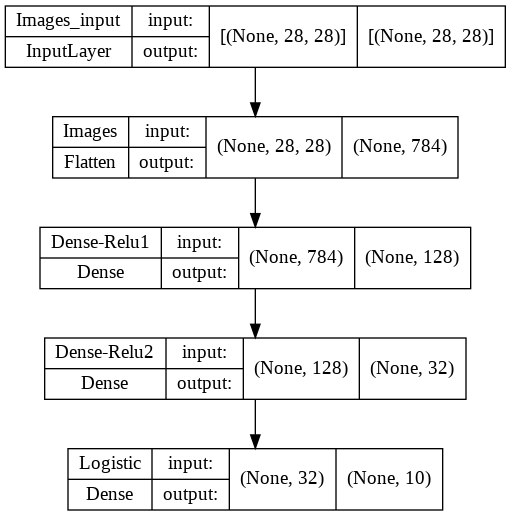

In [9]:
# Building a feed-forward network

model = tf.keras.Sequential() # empty model

# Layer0 simply flattens image input
layer0 = tf.keras.layers.Flatten(input_shape=np.shape(trImages[0]),name='Images')
model.add(layer0)

# Layer1 is a dense layer
numUnits_L1 =128
layer1 = tf.keras.layers.Dense(units=numUnits_L1, activation=tf.nn.relu, use_bias=True,name='Dense-Relu1')
model.add(layer1)

# Layer2 is a dense layer
numUnits_L2 =32
layer2 = tf.keras.layers.Dense(units=numUnits_L2, activation=tf.nn.relu, use_bias=True,name='Dense-Relu2')
model.add(layer2)

# Layer3 is the output layer
numUnits_L3 = 10
layer3 = tf.keras.layers.Dense(units=numUnits_L3, activation=tf.nn.softmax, use_bias=True, name='Logistic')
model.add(layer3)

# Compile model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy']) #'sparse_categorical_crossentropy'

# Plot Logistic Regression Network
tf.keras.utils.plot_model(model,show_shapes=True,show_layer_names=True)


In [10]:
# Normalizing input 
trImages = trImages/255.0
tImages = tImages/255.0

# Train the model
trHistory = model.fit(x=trImages, y=trLabels, batch_size=batchSize, epochs=nEpochs,shuffle=False, validation_split=0.0)

Epoch 1/150
469/469 [==============================] - 2s 3ms/step - loss: 1.3059 - accuracy: 0.5755
Epoch 2/150
469/469 [==============================] - 1s 3ms/step - loss: 0.7164 - accuracy: 0.7412
Epoch 3/150
469/469 [==============================] - 1s 3ms/step - loss: 0.6193 - accuracy: 0.7722
Epoch 4/150
469/469 [==============================] - 1s 3ms/step - loss: 0.5751 - accuracy: 0.7904
Epoch 5/150
469/469 [==============================] - 1s 3ms/step - loss: 0.5456 - accuracy: 0.8033
Epoch 6/150
469/469 [==============================] - 1s 3ms/step - loss: 0.5228 - accuracy: 0.8120
Epoch 7/150
469/469 [==============================] - 1s 3ms/step - loss: 0.5038 - accuracy: 0.8194
Epoch 8/150
469/469 [==============================] - 1s 3ms/step - loss: 0.4874 - accuracy: 0.8259
Epoch 9/150
469/469 [==============================] - 1s 3ms/step - loss: 0.4730 - accuracy: 0.8313
Epoch 10/150
469/469 [==============================] - 1s 3ms/step - loss: 0.4604 - accura

In [11]:
tPrediction = model.predict(tImages) # output is a matrix of probabilities where each row corresponds to an image in the Test Set
idCount = 0
nErrs = 0
for _ in tPrediction:
  predictedLabel = np.argmax(_)
  if predictedLabel != tLabels[idCount]:
     nErrs += 1
  idCount += 1

errRate = nErrs / float(np.shape(tImages)[0])
print("Prediction Error = %f" %errRate)

Prediction Error = 0.119800


##Summary

In a Single-Layer implementation, we apply logistic regression directly on pixels of input images. With this network, we achieve classification error of ~$19\%$. In a Multi-Layer implementation, we apply two ReLu layers on pixels of input images prior to applying logistic regression. With this network, we achieve classification error of ~$12\%$.

Single-layer implementation uses a $784$ weight-matrix while Multi-Layer implementation uses a $784 \times 128 \times 32 \times 10 $ weight-matrix, i.e., a total of $> 32$ million weights. With a factor of $40000$ more weights, we achieve an improvement of $6%$ in classification error rate.